# LENET

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


In [19]:
Y_train = train.iloc[:,0:1]
X_train=train.iloc[:,1:]
X_test = test

In [72]:
X_train.shape

(42000, 1, 32, 32)

In [ ]:
train_test_split()

In [20]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


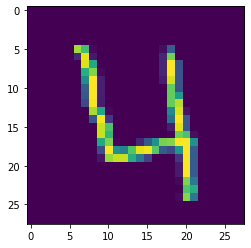

In [22]:
sample = X_train.iloc[3, :]
sample = sample.values.reshape([28,28])
plt.imshow(sample)


In [23]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [25]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [7]:
#from keras.utils.np_utils import to_categorical
#Y_train = to_categorical(Y_train)

In [26]:
#Padding the images by 2 pixels since in the paper input images were 32x32
X_train = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_test = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')

#Standardization
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)
X_train = (X_train - mean_px)/(std_px)


In [27]:
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(Y_train)

In [28]:
X_train=X_train.reshape(X_train.shape[0], 1, 32, 32)

In [29]:
X_test.shape

(28000, 32, 32, 1)

In [30]:
import keras 
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers.convolutional import Conv2D
from keras.layers import BatchNormalization
from keras import backend as K
K.set_image_dim_ordering('th')
batch_size = 32

In [31]:
model = Sequential()
model.add(Conv2D(filters = 96,kernel_size =(7,7),strides = (1,1),activation = 'relu',input_shape = (1,32,32)))
# (55, 55, 96)
model.add(MaxPooling2D(pool_size = (2,2),strides = (1,1),padding='same',dim_ordering="th"))
        # (27, 27, 96)
#         model.add(BatchNormalization(axis=-1))
model.add(Conv2D(filters = 256,kernel_size =(5,5),strides = (4,4),activation = 'relu' ))
               
model.add(MaxPooling2D(pool_size = (3,3),strides =(1,1),padding='same',dim_ordering="th"))
#model.add(BatchNormalization(axis=-1))
# model.add(Conv2D(filters = 512,kernel_size = (3,3),strides = (1,1),activation = 'relu'))
# model.add(Conv2D(filters = 1024,kernel_size = (3,3),strides = (1,1),activation = 'relu'))
# model.add(Conv2D(filters = 512,kernel_size = (3,3),strides = (1,1),activation = 'relu'))
# model.add(MaxPooling2D(pool_size = (3,3),strides =(1,1),padding='same',dim_ordering="th"))
model.add(Flatten())
model.add(Dense(units =256,activation='relu'))
model.add(Dense(units =256,activation='relu'))
model.add(Dense(units = 10, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


model.summary()
history = model.fit(X_train, Y_train, epochs=1, batch_size=batch_size)
       

   

/home/cocoslabs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding="same", data_format="channels_first")`
  after removing the cwd from sys.path.
/home/cocoslabs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding="same", data_format="channels_first")`
  if __name__ == '__main__':


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 96, 26, 26)        4800      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 96, 26, 26)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 256, 6, 6)         614656    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 256, 6, 6)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               2359552   
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
__________

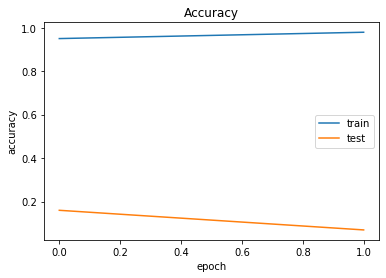

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['loss'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

In [15]:
test_labels = train['label']

In [16]:
train.drop('label', axis = 1, inplace = True)

In [68]:
X_test.shape

(28000, 1, 32, 32)

test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

In [69]:
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
test_labels = label_binrizer.fit_transform(test_labels)
print(test_images)

[[[[       0        1        2 ...       25       26       27]
   [      28       29       30 ...       53       54       55]
   [      56       57       58 ...       81       82       83]
   ...
   [     700      701      702 ...      725      726      727]
   [     728      729      730 ...      753      754      755]
   [     756      757      758 ...      781      782      783]]]


 [[[     784      785      786 ...      809      810      811]
   [     812      813      814 ...      837      838      839]
   [     840      841      842 ...      865      866      867]
   ...
   [    1484     1485     1486 ...     1509     1510     1511]
   [    1512     1513     1514 ...     1537     1538     1539]
   [    1540     1541     1542 ...     1565     1566     1567]]]


 [[[    1568     1569     1570 ...     1593     1594     1595]
   [    1596     1597     1598 ...     1621     1622     1623]
   [    1624     1625     1626 ...     1649     1650     1651]
   ...
   [    2268     2269     

In [73]:
import numpy as np

# test_images = np.arange(21952000).reshape(784, 28000 )

test_images = test_images.reshape((test_images.shape[1], 1,28,28))

print(test_images.shape)
#test_images = test_images.reshape(test_images.shape[0], 32, 32, 1)"""

ValueError: cannot reshape array of size 21952000 into shape (1,1,28,28)

In [75]:
y_pred = model.predict(X_test.iloc[:5])


In [79]:
y_pred

array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [9.9996996e-01, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 3.0048774e-05],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [78]:
np.argmax(y_pred,axis=1)

array([2, 0, 9, 0, 3])

In [ ]:
import numpy as np

data3 = np.arange(122304).reshape(52, 2352 )

data3 = data3.reshape((data3.shape[0]*3, 28, 28))

print(data3.shape)

